**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Data Summary:**

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

1.Actinic keratosis

2.Basal cell carcinoma

3.Dermatofibroma

4.Melanoma

5.Nevus

6.Pigmented benign keratosis

7.Seborrheic keratosis

8.Squamous cell carcinoma

9.Vascular lesion

## **Importing Skin Cancer Data**

## **Importing all the important libraries**

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [2]:
## If you are using the data by mounting the google drive, use the following :

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/drive/MyDrive/Program/Data Set'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## Load using keras.preprocessing

### Let's load these images off disk using the helpful image_dataset_from_directory utility.

## Create a dataset

### Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

### Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the data

## **Todo, create a code to visualize one instance of all the nine classes present in the dataset**

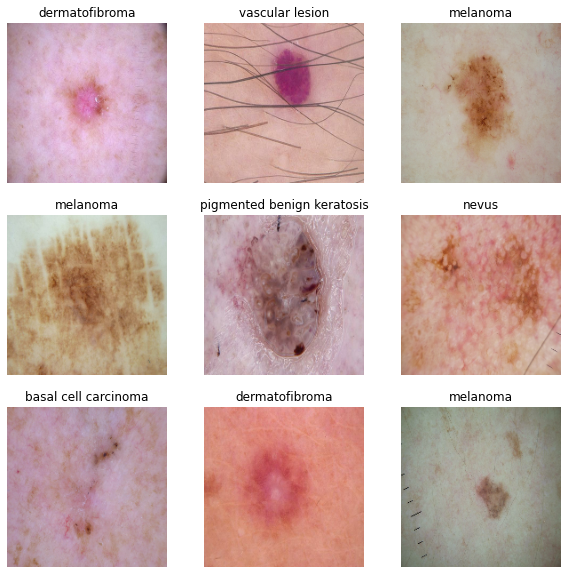

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

##Create the model

Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [11]:
### Your code goes here

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

## **Compile the model**

Choose an appropirate optimiser and loss function for model training

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

# Train the model

In [14]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 2191s 3s/step - loss: 1.8514 - accuracy: 0.2882 - val_loss: 1.5487 - val_accuracy: 0.3749
Epoch 2/20
169/169 [==============================] - 4s 24ms/step - loss: 1.3933 - accuracy: 0.4813 - val_loss: 1.3701 - val_accuracy: 0.5004
Epoch 3/20
169/169 [==============================] - 4s 23ms/step - loss: 1.1812 - accuracy: 0.5749 - val_loss: 1.0984 - val_accuracy: 0.6080
Epoch 4/20
169/169 [==============================] - 4s 23ms/step - loss: 1.0281 - accuracy: 0.6243 - val_loss: 1.1778 - val_accuracy: 0.5872
Epoch 5/20
169/169 [==============================] - 4s 23ms/step - loss: 0.8297 - accuracy: 0.7022 - val_loss: 0.8430 - val_accuracy: 0.7231
Epoch 6/20
169/169 [==============================] - 4s 23ms/step - loss: 0.6485 - accuracy: 0.7693 - val_loss: 0.9048 - val_accuracy: 0.7045
Epoch 7/20
169/169 [==============================] - 4s 23ms/step - loss: 0.5172 - accuracy: 0.8197 - val_loss: 0.7984 - val_accuracy: 0.750

# Visualizing training results

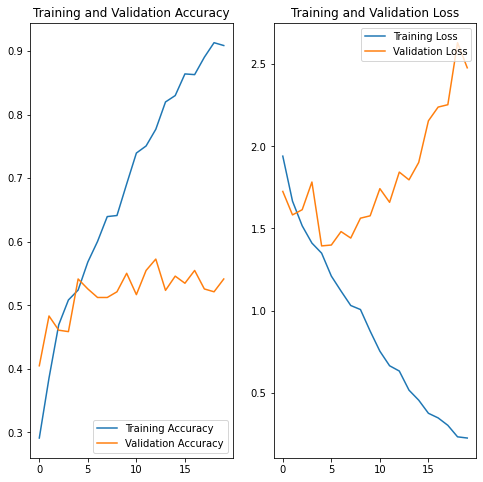

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.evaluate(val_ds)

14/14 [==============================] - 0s 23ms/step - loss: 2.4777 - accuracy: 0.5414


[2.477680206298828, 0.5413870215415955]

### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### The plots show that training accuracy and validation accuracy are off by large margins, and the model has achieved only around 54.8% accuracy on the validation set. From the graphs it is clear that the model is overfitting.

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal',
                      input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

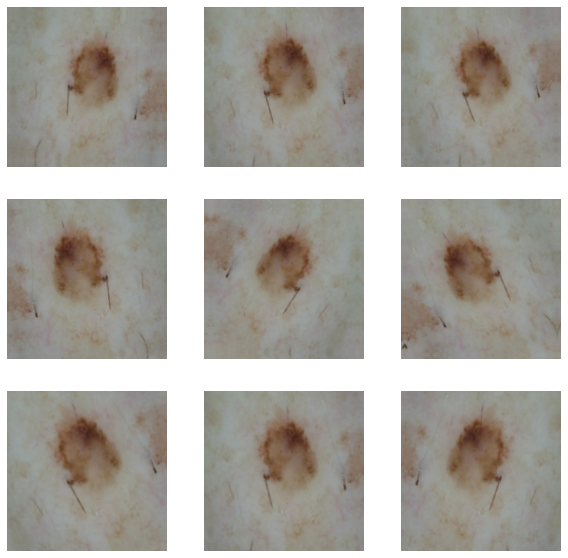

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))

for images, _ in train_ds.take(1):
    for i in range(num_classes):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

## Todo:

## Create the model, compile and train the model

In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

## Compiling the model

In [19]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

## Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 6s 27ms/step - loss: 1.7002 - accuracy: 0.3470 - val_loss: 1.4563 - val_accuracy: 0.4618
Epoch 2/20
169/169 [==============================] - 4s 25ms/step - loss: 1.4390 - accuracy: 0.4588 - val_loss: 1.3567 - val_accuracy: 0.4826
Epoch 3/20
169/169 [==============================] - 4s 26ms/step - loss: 1.3781 - accuracy: 0.4815 - val_loss: 1.3240 - val_accuracy: 0.5011
Epoch 4/20
169/169 [==============================] - 4s 26ms/step - loss: 1.2799 - accuracy: 0.5165 - val_loss: 1.2409 - val_accuracy: 0.5330
Epoch 5/20
169/169 [==============================] - 4s 26ms/step - loss: 1.2057 - accuracy: 0.5423 - val_loss: 1.1990 - val_accuracy: 0.5501
Epoch 6/20
169/169 [==============================] - 4s 26ms/step - loss: 1.2175 - accuracy: 0.5399 - val_loss: 1.1529 - val_accuracy: 0.5494
Epoch 7/20
169/169 [==============================] - 4s 25ms/step - loss: 1.1037 - accuracy: 0.5784 - val_loss: 1.1588 - val_accuracy: 0.5768

## Visualizing the results

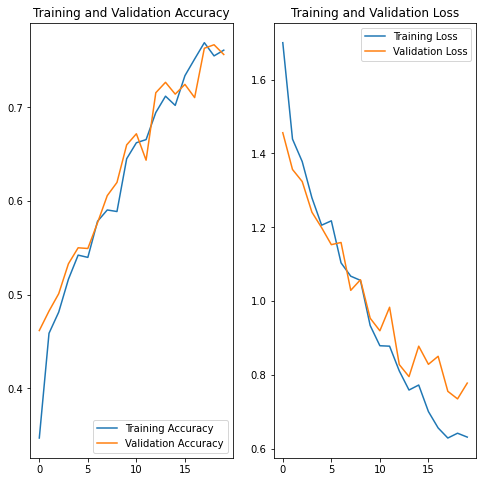

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
model.evaluate(val_ds)

43/43 [==============================] - 1s 12ms/step - loss: 0.7779 - accuracy: 0.7565


[0.7778840661048889, 0.7564958930015564]

### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### **After comparing the graphs obtained from the previous model and the current model, the current model is better than the older model, as overfitting seems to have been dealt with. It can also be seen that the validation loss has been significantly reduced. However the accuracy of the model on the vallidation set is still around 54% which is indicative of underfitting.bold text**

### **Todo**: Find the distribution of classes in the training dataset.

### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

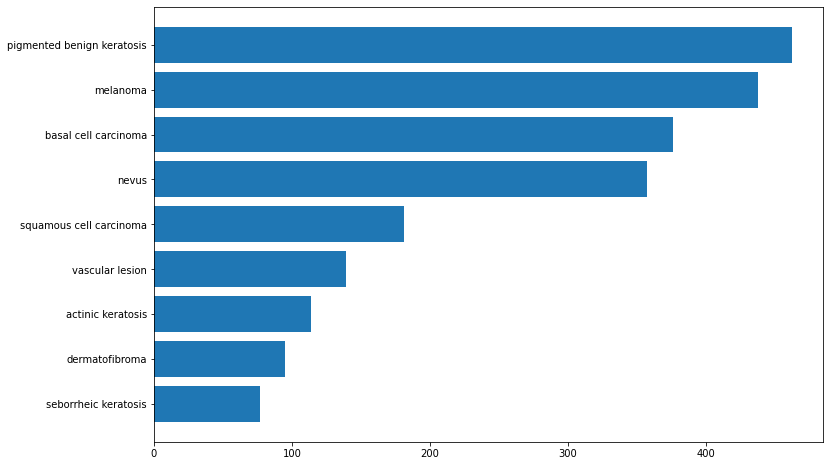

In [23]:
## Your code goes here.
count = {}

for i in class_names:
    count[i] = len(list(data_dir_train.glob(f'{i}/*.jpg')))

count = dict(sorted(count.items(), key=lambda x: x[1]))

count_list = list(count.items())
x, y = zip(*count_list)

plt.figure(figsize=(12, 8))
plt.barh(x, y)
plt.show()

### **Todo:** Write your findings here:

### **- Which class has the least number of samples?**

  - Seborrheic Keratosis has the least number of sample

**- Which classes dominate the data in terms proportionate number of samples?**
- Pigmented Benign Keratosis dominates the data in terms of proportionate number of samples.


### **Todo:** Rectify the class imbalance

### **Context:** You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:


1.   Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2.   Define a number of operations to perform on this data set using your Pipeline object.
3.   Execute these operations by calling the Pipeline’s sample() method.







In [25]:
path_to_training_dataset = "/content/drive/MyDrive/Program/Data Set/Train/"

import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Program/Data Set/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB6209F0050>: 100%|██████████| 500/500 [00:19<00:00, 25.77 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB6B39F4B10>: 100%|██████████| 500/500 [00:20<00:00, 24.48 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Program/Data Set/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB6B1A51DD0>: 100%|██████████| 500/500 [00:21<00:00, 23.61 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Program/Data Set/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7FB6B39F4B10>: 100%|██████████| 500/500 [01:31<00:00,  5.49 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Program/Data Set/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB636477F10>: 100%|██████████| 500/500 [01:21<00:00,  6.14 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Program/Data Set/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB6A005B4D0>: 100%|██████████| 500/500 [00:18<00:00, 27.46 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Program/Data Set/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB6363E1750>: 100%|██████████| 500/500 [00:41<00:00, 11.91 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Program/Data Set/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB6A01134D0>: 100%|██████████| 500/500 [00:17<00:00, 28.09 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Program/Data Set/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB6365124D0>: 100%|██████████| 500/500 [00:18<00:00, 27.51 Samples/s]


In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [27]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list

['/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/ISIC_0024673.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/ISIC_0024787.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/ISIC_0025102.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/ISIC_0024504.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/ISIC_0024949.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/ISIC_0025144.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/ISIC_0024897.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/ISIC_0024666.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/ISIC_0025031.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/ISIC_0024550.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/ISIC_0024582.jpg',
 '/content/drive/MyDrive/Program

In [28]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [29]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [30]:
original_df = pd.DataFrame(list(dataframe_dict.items()), columns=['Path', 'Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

In [31]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
path_list_new

['/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027865.jpg_81984010-db5a-4fe8-be04-cb9a8589d7a6.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0029082.jpg_9951edfc-11de-4f39-bc72-707ebf0b779b.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027120.jpg_3c14b10f-5071-4d51-bd0f-1ce63020c3ba.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027135.jpg_215c0b13-4acb-48d2-af70-f6feb42db65c.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0027297.jpg_265c9fde-7675-4ba6-83d6-62466c2c1df9.jpg',
 '/content/drive/MyDrive/Program/Data Set/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0029647.jpg_f7a9ef40-7d33-40ec-beb1-105877ca1a36.jpg',
 '/c

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [33]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [34]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [35]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

### **Todo:** Train the model on the data created using Augmentor

In [36]:
batch_size = 32
img_height = 180
img_width = 180

### **Todo:** Create a training dataset

In [37]:
data_dir_train = "/content/drive/MyDrive/Program/Data Set/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


### **Todo:** Create a validation dataset

In [38]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [39]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### **Todo:** Create your model (make sure to include normalization)

In [40]:
## your code goes here
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [41]:
## your code goes here
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### **Todo:** Train your model

In [42]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/50
281/281 [==============================] - 51s 57ms/step - loss: 1.9355 - accuracy: 0.2595 - val_loss: 1.4523 - val_accuracy: 0.4370
Epoch 2/50
281/281 [==============================] - 7s 26ms/step - loss: 1.4449 - accuracy: 0.4508 - val_loss: 1.3952 - val_accuracy: 0.4753
Epoch 3/50
281/281 [==============================] - 7s 25ms/step - loss: 1.2904 - accuracy: 0.5126 - val_loss: 1.3818 - val_accuracy: 0.4660
Epoch 4/50
281/281 [==============================] - 7s 25ms/step - loss: 1.1832 - accuracy: 0.5487 - val_loss: 1.1214 - val_accuracy: 0.5656
Epoch 5/50
281/281 [==============================] - 7s 25ms/step - loss: 1.0947 - accuracy: 0.5842 - val_loss: 0.9924 - val_accuracy: 0.6164
Epoch 6/50
281/281 [==============================] - 7s 26ms/step - loss: 1.0250 - accuracy: 0.6098 - val_loss: 0.9269 - val_accuracy: 0.6444
Epoch 7/50
281/281 [==============================] - 7s 25ms/step - loss: 0.9323 - accuracy: 0.6474 - val_loss: 0.8306 - val_accuracy: 0.685

### **Todo:** Visualize the model results

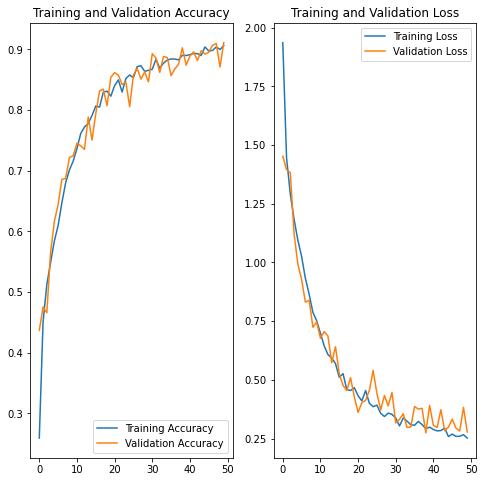

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
model.evaluate(val_ds)

71/71 [==============================] - 1s 14ms/step - loss: 0.2774 - accuracy: 0.9110


[0.27744588255882263, 0.910992443561554]

### **Todo:** Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

### **After rebalancing of the class the accuracy on the validation set has shown major improvement, as opposed to the previous 53-55% accuracy, the validation set now shows 91% accuracy. This confirms that class rebalance helped in dealing with the underfitting that was present after using dropouts to deal with overfitting.**